In [44]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import  average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [45]:
train_data = pd.read_csv('train.csv')

In [46]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [47]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
train_data.shape

(891, 12)

In [51]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

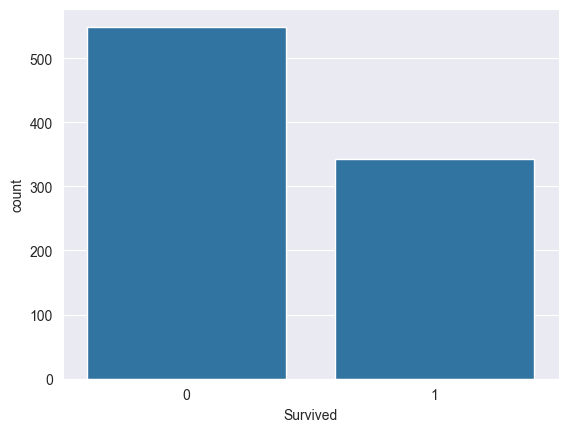

In [52]:
sns.countplot(x='Survived', data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

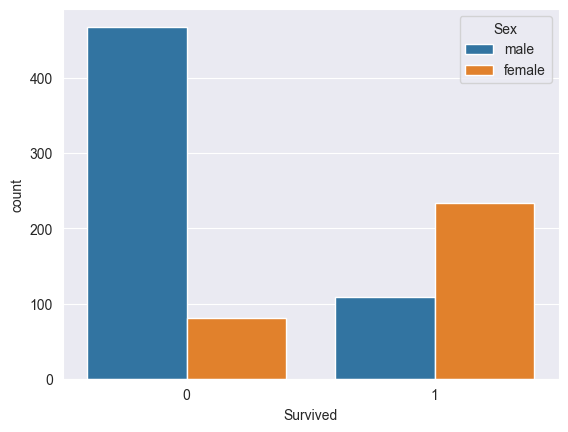

In [53]:
sns.countplot(x='Survived', hue='Sex', data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

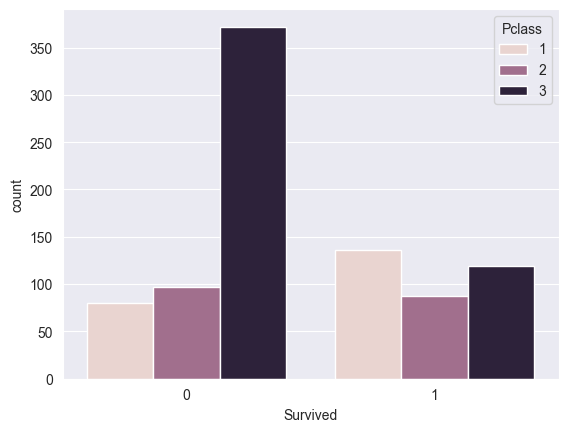

In [54]:
sns.countplot(x='Survived', hue='Pclass', data=train_data) 

<Axes: xlabel='Pclass', ylabel='Survived'>

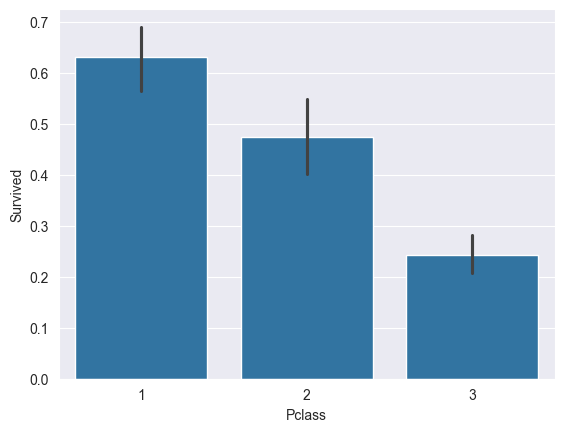

In [55]:
sns.barplot(x="Pclass", y="Survived", data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

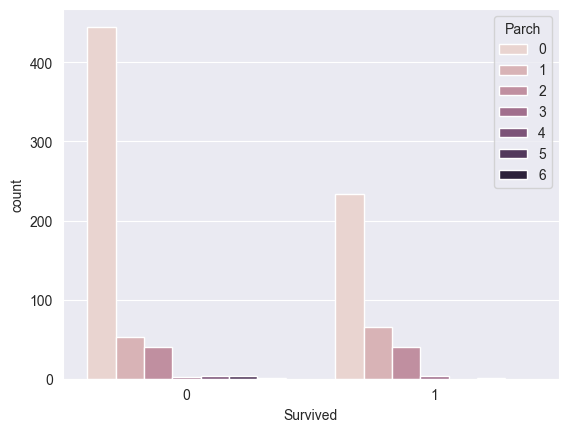

In [56]:
sns.countplot(x='Survived', hue='Parch', data=train_data) 

<Axes: xlabel='Survived', ylabel='count'>

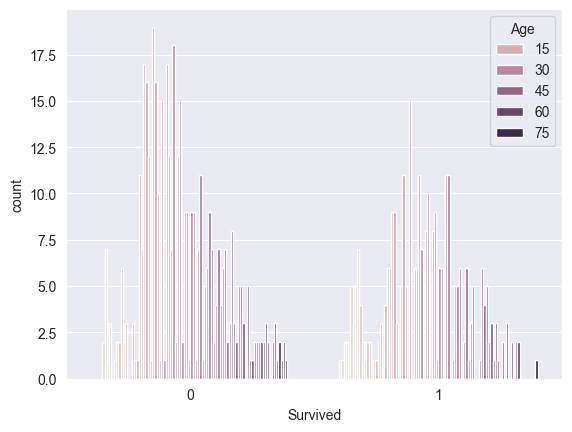

In [57]:
sns.countplot(x='Survived', hue='Age', data=train_data) 

<Axes: xlabel='Survived', ylabel='count'>

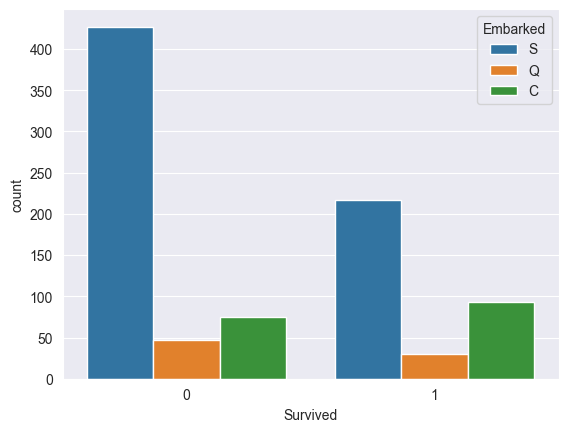

In [58]:
sns.countplot(x='Survived', hue='Embarked', data=train_data) 

In [59]:
train_data["CabinBool"] = (train_data["Cabin"].notnull().astype('int'))
# test_data["CabinBool"] = (test_data["Cabin"].notnull().astype('int'))

In [60]:
train_data = train_data.drop(['Cabin'], axis = 1)
# test_data = test_data.drop(['Cabin'], axis = 1)

<Axes: xlabel='CabinBool', ylabel='Survived'>

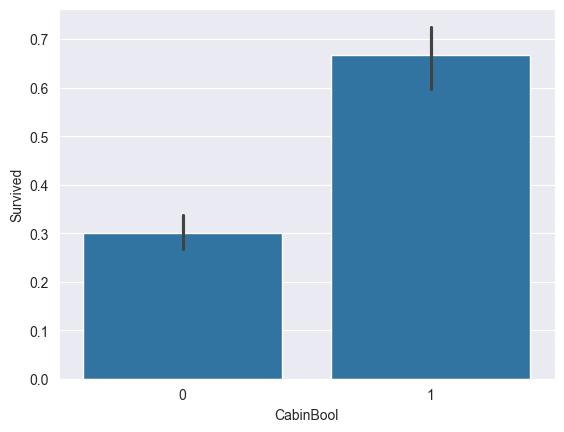

In [61]:
sns.barplot(x="CabinBool", y="Survived", data=train_data)

# Чистим данные

In [62]:
train_data = train_data.drop(['Ticket'], axis = 1)
# test_data = test_data.drop(['Ticket'], axis = 1)

In [63]:
train_data = train_data.drop(['PassengerId'], axis = 1)
# test_data = test_data.drop(['PassengerId'], axis = 1)

In [64]:
data = [train_data]

for dataset in data:
    mean = train_data["Age"].mean()
    std = train_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)

In [65]:
train_data["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [66]:
common_value = 'S'
data = [train_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

Заполнили пропущенные значения

In [67]:
data = [train_data ]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [68]:
data = [train_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
train_data = train_data.drop(['Name'], axis=1)
# test_data = test_data.drop(['Name'], axis=1)

In [69]:
genders = {"male": 0, "female": 1}
data = [train_data]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [70]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [71]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,0,3,0,22,1,0,7,0,0,1
1,1,1,1,38,1,0,71,1,1,3
2,1,3,1,26,0,0,7,0,0,2
3,1,1,1,35,1,0,53,0,1,3
4,0,3,0,35,0,0,8,0,0,1


<Axes: >

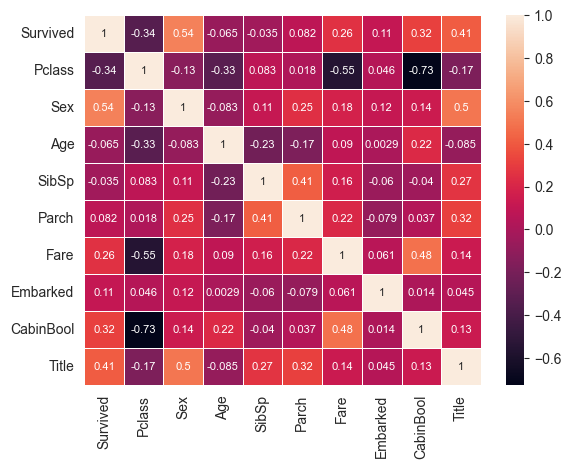

In [72]:
sns.heatmap(train_data.corr(), linewidths=.5, annot_kws={"size": 8}, annot=True)

In [73]:
y_train = train_data['Survived']
X_train = train_data.drop(['Survived'], axis=1)
features_train, features_rem, target_train, target_rem = train_test_split(X_train,y_train, train_size=0.7)

In [74]:
class LinearClassifier:
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for epoch in range(self.num_epochs + 1):
            y_pred = self._predict(X)

            dw = (1/num_samples) * np.dot(X.T, (y_pred - y))
            db = (1/num_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if epoch == self.num_epochs:
                loss = self._calculate_loss(y, y_pred)
                accuracy = accuracy_score(y, np.round(y_pred))
                print(f'Epoch {epoch}, mse: {loss}, Accuracy: {accuracy}')
                print(f'Gradients: dw={dw}, db={db}')

    def _predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def _calculate_loss(self, y_true, y_pred):
        return np.mean((y_pred - y_true)**2)

    def predict(self, X):
        return np.round(self._predict(X))

In [75]:
target = 'Survived'

X_train = train_data.drop(target, axis=1).values
y_train = train_data[target].values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

model = LinearClassifier(learning_rate=0.01, num_epochs=1000)
model.fit(X_train, y_train)

X_test = scaler.transform(features_rem.values)
predictions = model.predict(X_train)

accuracy = accuracy_score(y_train, predictions)
print("Accuracy:", accuracy)

Epoch 1000, mse: 0.13660602652474504, Accuracy: 0.8114478114478114
Gradients: dw=[ 6.41312493e-04 -1.85748509e-04  1.12864541e-04 -1.03161050e-04
 -5.38418791e-05  2.22651926e-04 -4.84748106e-05  4.13426094e-04
  2.65122702e-04], db=-1.6570781834426995e-05
Accuracy: 0.8114478114478114


In [76]:
clf = RandomForestClassifier()
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
clf = GridSearchCV(clf, parametrs, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [77]:
clf.best_params_

{'max_depth': 11,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 40}

In [78]:
from sklearn.metrics import f1_score
pred_valid= clf.best_estimator_.predict(X_test)
print(f1_score(target_rem, pred_valid ))

0.8601036269430052


# Анализ ROC/PR кривых

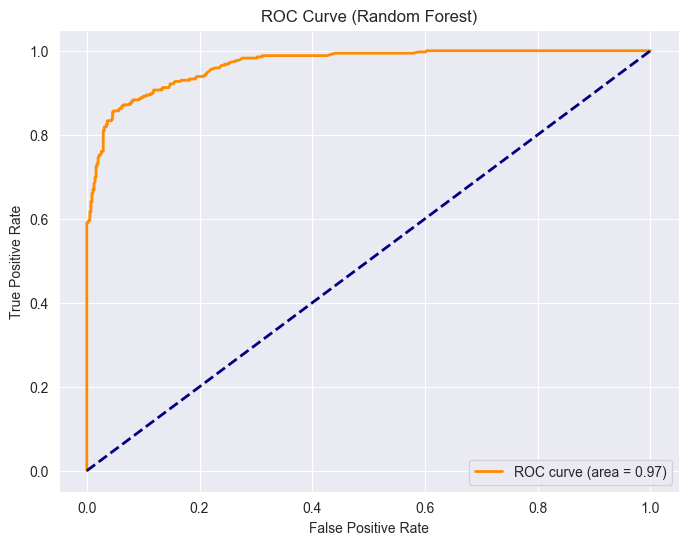

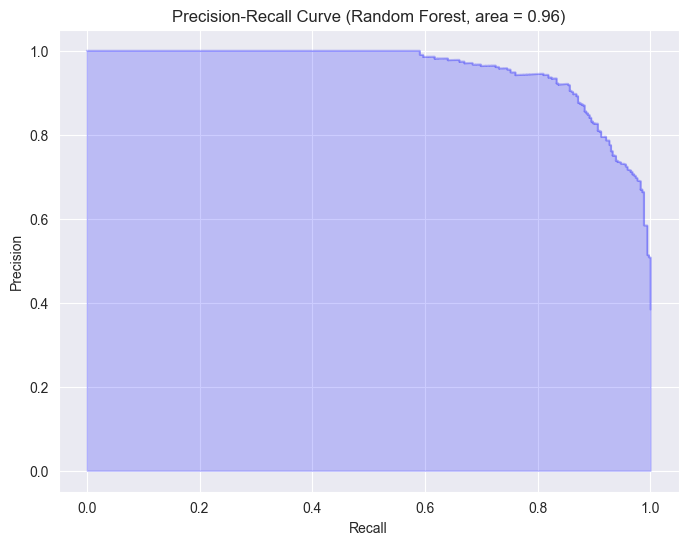

In [79]:
y_prob_rf = clf.predict_proba(X_train)[:, 1]

# ROC-кривая
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

# PR-кривая
precision_rf, recall_rf, _ = precision_recall_curve(y_train, y_prob_rf)
pr_auc_rf = average_precision_score(y_train, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.step(recall_rf, precision_rf, color='b', alpha=0.2, where='post')
plt.fill_between(recall_rf, precision_rf, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest, area = {:.2f})'.format(pr_auc_rf))
plt.show()

In [80]:
randForClassifier = clf.predict_proba(X_test)[:,1]

In [81]:
ranFor = roc_auc_score(target_rem, randForClassifier)
print('ROC-AUC:', ranFor)

ROC-AUC: 0.9610767872903796


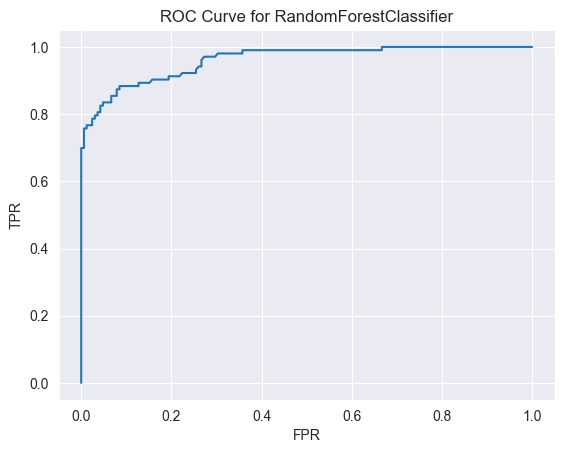

In [82]:
fpr, tpr, _ = roc_curve(target_rem, randForClassifier)
plt.plot(fpr, tpr)
plt.title('ROC Curve for RandomForestClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [83]:
precision, recall, _ = precision_recall_curve(target_rem, randForClassifier)
randForClassifier = auc(recall, precision)

print('PR-AUC:', randForClassifier)

PR-AUC: 0.9527276987300768


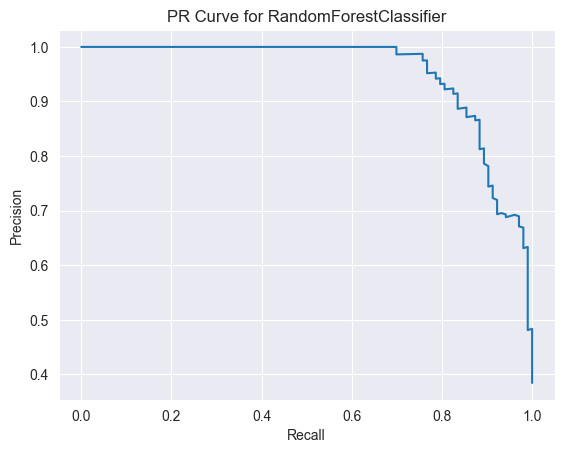

In [84]:
plt.plot(recall, precision)
plt.title('PR Curve for RandomForestClassifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Logreg

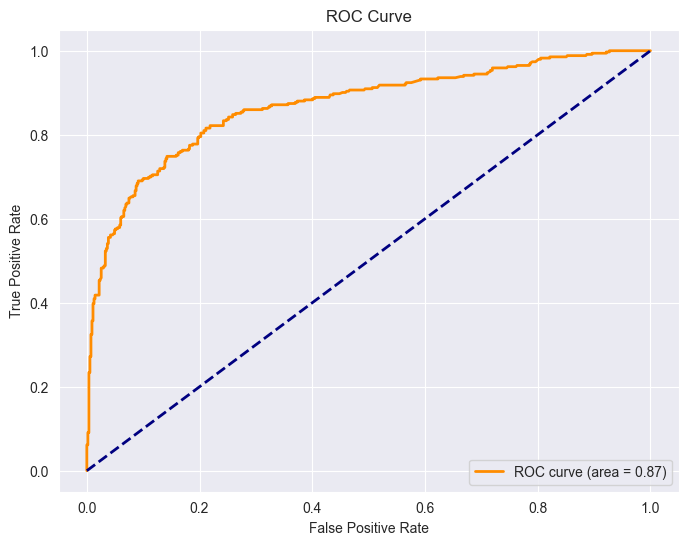

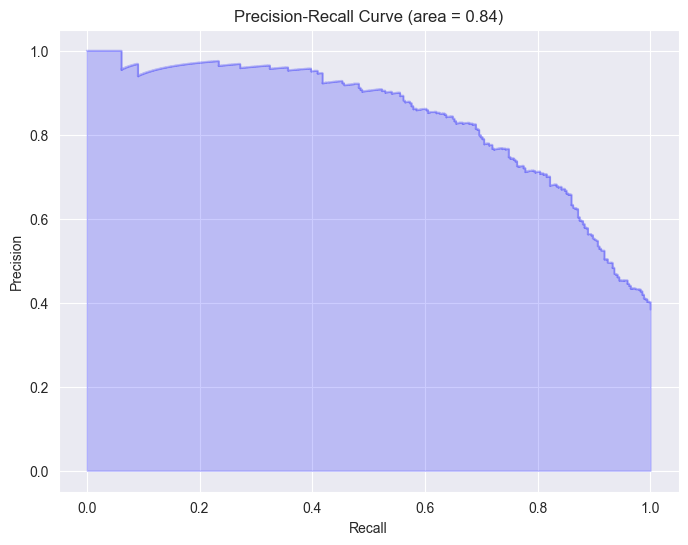

In [85]:
y_prob = model._predict(X_train)

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# PR-кривая
precision, recall, _ = precision_recall_curve(y_train, y_prob)
pr_auc = average_precision_score(y_train, y_prob)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (area = {:.2f})'.format(pr_auc))
plt.show()

Выбор между метриками AUC-ROC и AUC-PR зависит от конкретного контекста задачи.
AUC-ROC:
ROC-AUC хорошо работает в случаях сбалансированных классов.
Преимущества: Независимость от дисбаланса классов. Хорошо работает для оценки моделей в сценариях, где важны как True Positive Rate (чувствительность), так и False Positive Rate.
AUC-PR:
PR-AUC часто предпочтителен в случаях несбалансированных классов, где наблюдается диспропорция между классами.
Преимущества: Учитывает дисбаланс классов. Хорошо работает в сценариях, где более важна точность (Precision) и полнота (Recall).

В контексте задачи "Титаник" предпочтительной метрикой будет AUC-ROC (площадь под кривой ROC).
Задача предсказания выживания на Титанике обычно характеризуется относительно сбалансированными классами (выжившие и не выжившие). В таких случаях AUC-ROC хорошо работает.
ROC-кривая оценивает компромисс между чувствительностью (способность модели правильно классифицировать выживших) и специфичностью (способность модели правильно классифицировать не выживших).
Хотя PR-AUC (площадь под кривой PR) также может быть полезной в сценариях с несбалансированными классами, в контексте задачи "Титаник" AUC-ROC предпочтительнее.

# Простейшая задача двухклассовой классификации

Optimal Classifier for mu=0.3


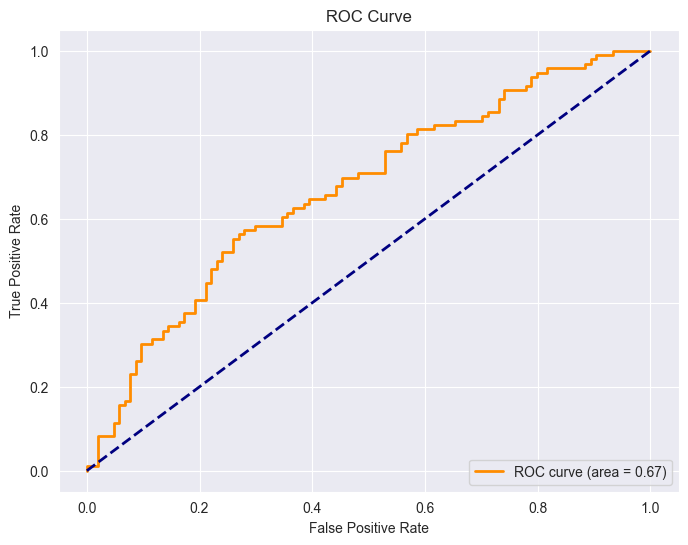

Optimal Classifier for mu=0.5


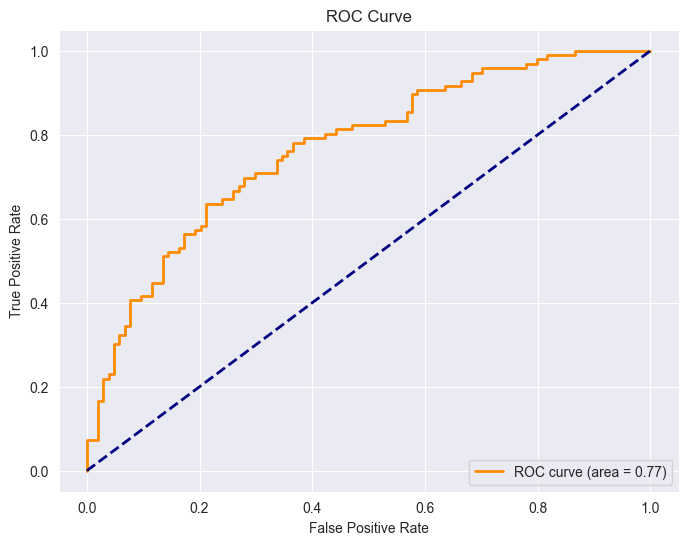

Optimal Classifier for mu=1


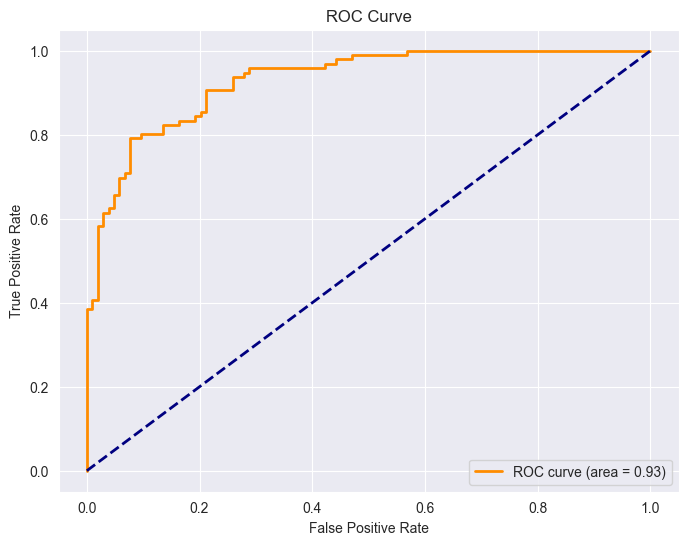

Optimal Classifier for mu=1.5


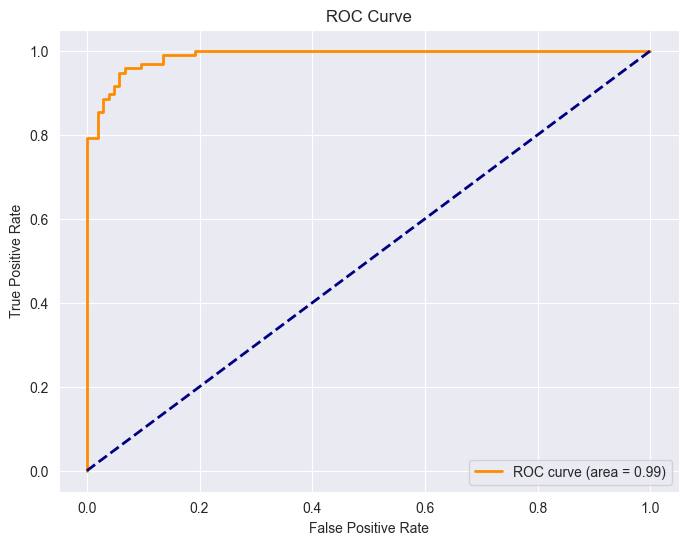

Optimal Classifier for mu=2


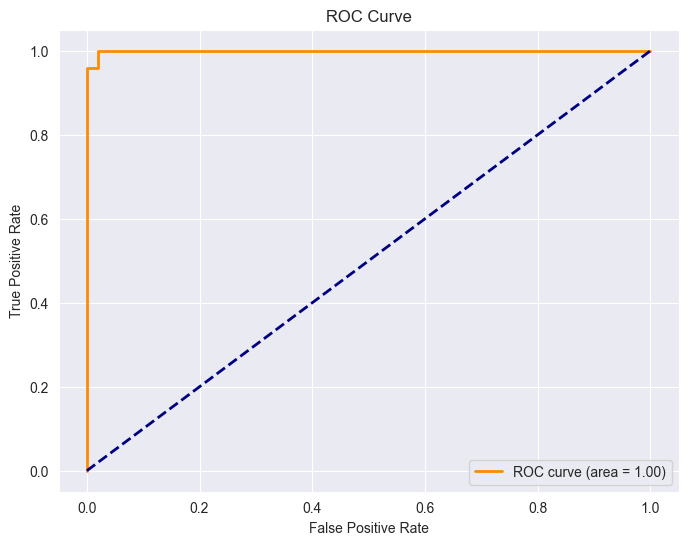

Optimal Classifier for mu=2.5


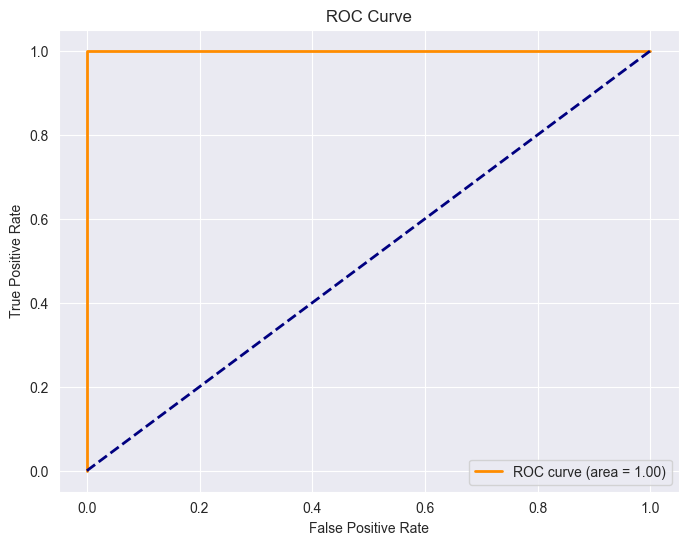

Optimal Classifier for mu=3


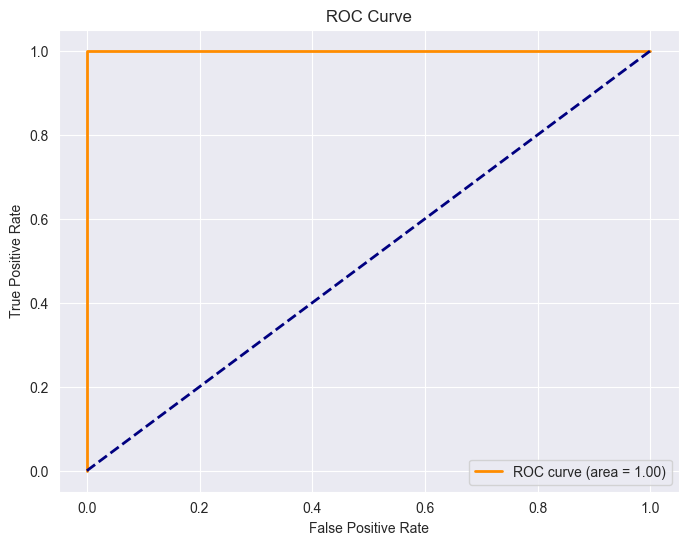

In [86]:
def generate_data(mu_positive, mu_negative, num_samples=1000):
    np.random.seed(42)
    positive_samples = np.random.normal(loc=mu_positive, scale=1, size=num_samples//2)
    negative_samples = np.random.normal(loc=mu_negative, scale=1, size=num_samples//2)
    X = np.concatenate([positive_samples, negative_samples])
    y = np.concatenate([np.ones(num_samples//2), np.zeros(num_samples//2)])
    return X, y

def train_and_plot_roc(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train.reshape(-1, 1), y_train)

    y_prob = model.predict_proba(X_test.reshape(-1, 1))[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

mu_values = [0.3, 0.5, 1, 1.5, 2, 2.5, 3]

for mu in mu_values:
    X, y = generate_data(mu_positive=mu, mu_negative=-mu)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"Optimal Classifier for mu={mu}")
    train_and_plot_roc(X_train, y_train, X_test, y_test)

Полученные выводы указывают на то, что линейный классификатор, использующий метод опорных векторов (SVM), является оптимальным для данной задачи. При увеличении значения параметра μ, площадь под ROC-кривой (ROC-AUC) стремится к 1, что говорит о том, что модель лучше справляется с классификацией, и сценарий становится ближе к случаю, когда выборка может быть линейно разделена.